In [33]:
# ==============================================================================
# Bloco 1: Carregamento dos Dados Prontos para Modelagem
# ==============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Define o caminho para o arquivo que foi salvo pelo notebook anterior
caminho_carregar = '../data/processed/df_model_ready.pkl'

# Tenta carregar o arquivo e trata o erro caso ele não exista
try:
    df_modelo = pd.read_pickle(caminho_carregar)
    print("DataFrame 'df_model_ready.pkl' carregado com sucesso!")
    print(f"O dataset contém {df_modelo.shape[0]} amostras e {df_modelo.shape[1]} colunas.")
except FileNotFoundError:
    print(f"ERRO: Arquivo {caminho_carregar} não encontrado.")
    print("Por favor, execute o notebook '02_Analysis_and_Feature_Engineering.ipynb' primeiro para gerar o arquivo.")

# Exibe as primeiras linhas para confirmar que os dados foram carregados corretamente
if 'df_modelo' in locals():
    display(df_modelo.head())

DataFrame 'df_model_ready.pkl' carregado com sucesso!
O dataset contém 4939 amostras e 9 colunas.


,mandante_media_GP_casa,mandante_media_GC_casa,visitante_media_GP_fora,visitante_media_GC_fora,Over_2_5,potencial_gols_mandante,potencial_gols_visitante,expectativa_total_gols,diferenca_forca
3846,1.763158,0.894737,0.842105,1.473684,0,3.236842,1.736842,4.973684,1.500000
3847,1.243421,0.960526,1.291498,1.271255,0,2.514676,2.252024,4.766700,0.262652
3848,1.131579,1.078947,0.552632,2.157895,1,3.289474,1.631579,4.921053,1.657895
3849,1.481781,0.781377,1.004049,1.348178,0,2.829960,1.785425,4.615385,1.044534
3850,1.609649,0.864035,0.912281,1.818713,0,3.428363,1.776316,5.204678,1.652047


In [42]:
# ==============================================================================
# Bloco 2: Preparação, Treinamento e Avaliação do Modelo (Naive Bayes com Novas Features)
# ==============================================================================
# Bibliotecas de Machine Learning do Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("\nBibliotecas de Machine Learning importadas com sucesso!")

if 'df_modelo' in locals():
    # 1. Separando as Features (X) e o Alvo (y) --- USANDO AS NOVAS FEATURES ---
    
    # Definimos as 4 NOVAS features de interação como entrada para o modelo
    features_para_modelo = [
        'mandante_media_GP_casa',
        'mandante_media_GC_casa',
        'visitante_media_GP_fora',
        'visitante_media_GC_fora',
        'potencial_gols_mandante',
        'potencial_gols_visitante',
        'expectativa_total_gols',
        'diferenca_forca'
    ]
    
    # Verificamos se as colunas existem no DataFrame antes de usá-las
    if all(feature in df_modelo.columns for feature in features_para_modelo):
        X = df_modelo[features_para_modelo] # X agora usa as features inteligentes
        y = df_modelo['Over_2_5']         # y continua sendo o nosso alvo

        print(f"\nNossas features (X): {list(X.columns)}")
        print(f"Nosso alvo (y): {y.name}")

        # 2. Dividindo os dados em conjuntos de Treino e Teste
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, 
            test_size=0.2,
            random_state=42,
            stratify=y
        )

        print(f"\nDados divididos: {len(X_train)} amostras para treino e {len(X_test)} para teste.")

        # 3. Criando e Treinando o Modelo Naive Bayes Gaussiano (o mesmo modelo de antes)
        modelo_nb = GaussianNB()

        print("\nTreinando o modelo Naive Bayes...")
        modelo_nb.fit(X_train, y_train)
        print(">>> Modelo treinado com sucesso!")

        # 4. Fazendo Previsões com os Dados de Teste
        print("\nFazendo previsões no conjunto de teste...")
        previsoes = modelo_nb.predict(X_test)

        # 5. Avaliando a Performance do Modelo
        print("\n--- Avaliação do Modelo com Features de Interação ---")
        print("="*55)
        acuracia = accuracy_score(y_test, previsoes)
        print(f"Acurácia do Modelo: {acuracia * 100:.2f}%")
        print("-"*55)
        print("Relatório de Classificação:")
        print(classification_report(y_test, previsoes, target_names=['Under 2.5', 'Over 2.5']))
        print("-"*55)
        print("Matriz de Confusão:")
        cm = confusion_matrix(y_test, previsoes)
        print(f"  - Previu 'Under' e acertou: {cm[0][0]}")
        print(f"  - Previu 'Over' e errou (era 'Under'): {cm[0][1]}")
        print(f"  - Previu 'Under' e errou (era 'Over'): {cm[1][0]}")
        print(f"  - Previu 'Over' e acertou: {cm[1][1]}")
        print("="*55)
    else:
        print("\nERRO: As features de interação não foram encontradas no 'df_modelo'.")
        print("Certifique-se de que o Notebook 02 foi executado e salvou o DataFrame com as novas features.")
else:
    print("\nERRO: DataFrame 'df_modelo' não foi carregado. Não é possível treinar o modelo.")


Bibliotecas de Machine Learning importadas com sucesso!

Nossas features (X): ['mandante_media_GP_casa', 'mandante_media_GC_casa', 'visitante_media_GP_fora', 'visitante_media_GC_fora', 'potencial_gols_mandante', 'potencial_gols_visitante', 'expectativa_total_gols', 'diferenca_forca']
Nosso alvo (y): Over_2_5

Dados divididos: 3951 amostras para treino e 988 para teste.

Treinando o modelo Naive Bayes...
>>> Modelo treinado com sucesso!

Fazendo previsões no conjunto de teste...

--- Avaliação do Modelo com Features de Interação ---
Acurácia do Modelo: 58.91%
-------------------------------------------------------
Relatório de Classificação:
              precision    recall  f1-score   support

   Under 2.5       0.61      0.79      0.69       562
    Over 2.5       0.54      0.32      0.40       426

    accuracy                           0.59       988
   macro avg       0.57      0.56      0.55       988
weighted avg       0.58      0.59      0.56       988

-----------------------

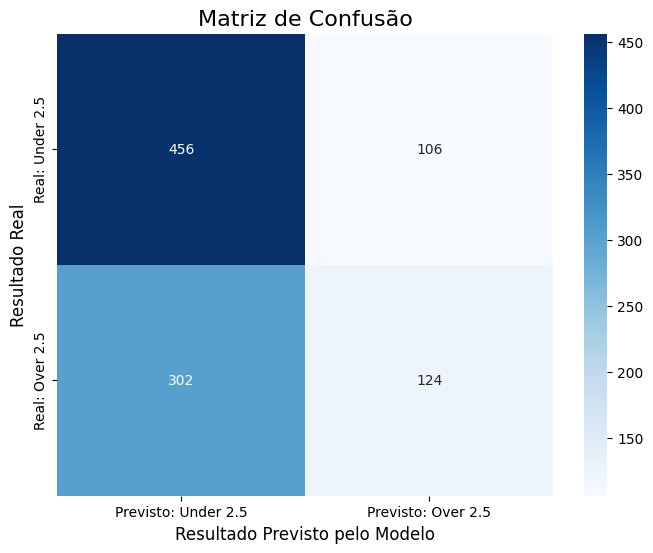

In [35]:
# ==============================================================================
# Bloco 12: Visualização da Matriz de Confusão
# ==============================================================================
# Uma visualização gráfica da matriz de confusão é muito mais fácil de interpretar

# Criando a figura
plt.figure(figsize=(8, 6))

# Criando o heatmap com o Seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Previsto: Under 2.5', 'Previsto: Over 2.5'],
            yticklabels=['Real: Under 2.5', 'Real: Over 2.5'])

# Adicionando título e rótulos
plt.title('Matriz de Confusão', fontsize=16)
plt.ylabel('Resultado Real', fontsize=12)
plt.xlabel('Resultado Previsto pelo Modelo', fontsize=12)

plt.show()

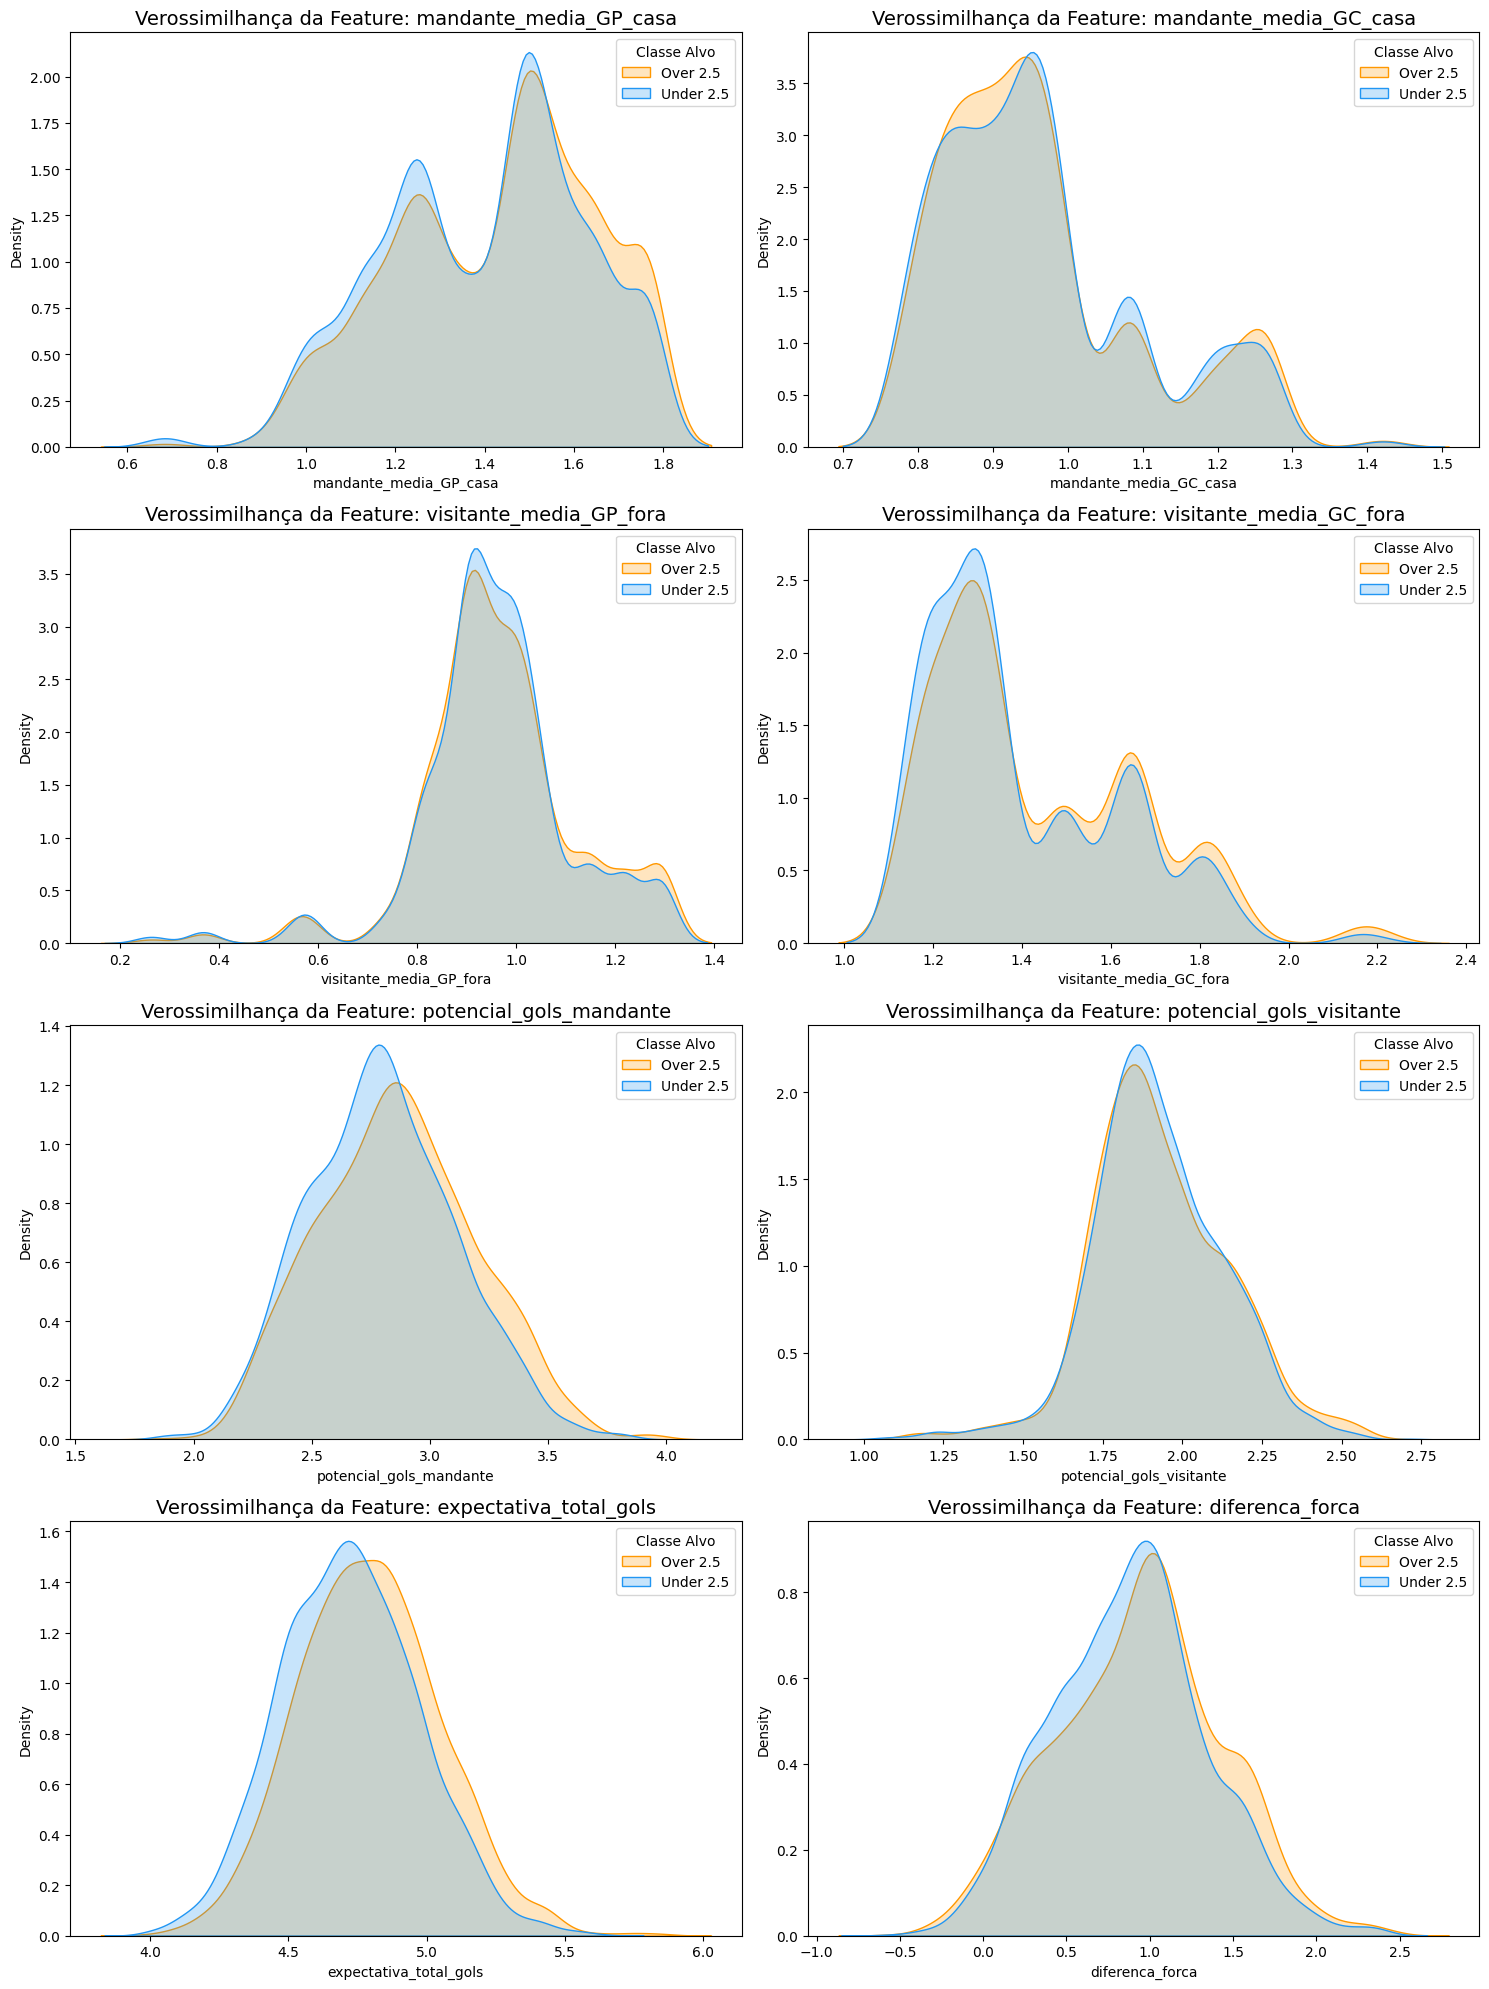

In [43]:
# ==============================================================================
# Bloco 5: Gráfico de Verossimilhança para TODAS as 8 Features
# ==============================================================================
if 'df_modelo' in locals():
    
    # Pega a lista de colunas de features do DataFrame X
    # (Assumindo que X foi definido no bloco de treinamento com as 8 features)
    features = X.columns
    
    # --- MUDANÇA PRINCIPAL AQUI ---
    # Cria uma grade de subplots 4x2 para acomodar os 8 gráficos
    # Aumentamos o figsize para a imagem não ficar achatada
    fig, axes = plt.subplots(4, 2, figsize=(15, 20))
    # ---------------------------
    
    # "Achata" o array de eixos para facilitar o loop (de 4x2 para uma lista de 8)
    axes = axes.flatten()
    
    # Loop para criar um gráfico para cada feature
    for i, feature in enumerate(features):
        ax = axes[i]
        sns.kdeplot(data=df_modelo, x=feature, hue='Over_2_5', fill=True, 
                    common_norm=False, palette=['#2196F3', '#FF9800'], ax=ax)
        ax.set_title(f'Verossimilhança da Feature: {feature}', fontsize=14)
        ax.legend(title='Classe Alvo', labels=['Over 2.5', 'Under 2.5'])

    # Ajusta o layout para evitar sobreposição de títulos
    plt.tight_layout()
    plt.show()
    
else:
    print("ERRO: O DataFrame 'df_modelo' não está definido.")
    print("Certifique-se de que o bloco de treinamento foi executado e a variável 'X' foi criada.")